In [13]:
import cv2
import time
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
from tkinter import *
from random import randint
import threading
from apscheduler.schedulers.background import BackgroundScheduler
from threading import Event, Thread



timer = None
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier("model/keras_model.h5", "model/labels.txt")
 
offset = 20
imgSize = 300
 
labels = ["A", "B", "C"]
sched = BackgroundScheduler()
text = ''

def predict(*args):
    
    global pred, timer
    pred = True
    time.sleep(0.05)
    pred = False
    timer = threading.Timer(2, predict)
    timer.start()    

predict()    
            
while True:
    
#     global hands, imgOutput, out, img, aspectRatio, imgCrop, imgWhite
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    out = img.copy()
    
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

#         cv2.rectangle(imgOutput, (x - offset, y - offset-50),(x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
#         cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)

        cv2.rectangle(imgOutput, (x-offset, y-offset),(x + w+offset, y + h+offset), (0, 0, 255), cv2.FILLED)
        cv2.putText(out, text, (50,100), cv2.FONT_HERSHEY_COMPLEX, 1.7, (0, 0, 255), 3)
    
    if pred and hands:
        alpha = 0.01
        mask = imgOutput.astype(bool)
        out[mask] = cv2.addWeighted(img, alpha, imgOutput, 1 - alpha, 0)[mask]
        cv2.imshow("ImageO", out)

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)


        def update(text):
            if labels[index] in 'ADEFGHIJKLMNOPQRSTUVWXYZ':
                text = text+labels[index]
            elif labels[index] == 'B' and text:
                text = text[:-1]
            elif labels[index] == 'C':
                text = text+' '

            return text

        text = update(text)    
                     
    else:    
        cv2.imshow("ImageO", out)
        
    k = cv2.waitKey(5)
    if k == ord('q'):
        timer.cancel()
        break
        
        
cap.release()
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 23ms/step


In [19]:
# note that there are many other schedulers available
from apscheduler.schedulers.background import BackgroundScheduler

sched = BackgroundScheduler()

def some_job():
    print('Every 10 seconds')

# seconds can be replaced with minutes, hours, or days
sched.add_job(some_job, 'interval', seconds=10)
sched.start()

...

sched.shutdown()

Every 10 seconds
Every 10 seconds
Every 10 seconds
Every 10 seconds


In [21]:
import time
from threading import Event, Thread

class RepeatedTimer:

    """Repeat `function` every `interval` seconds."""

    def __init__(self, interval, function, *args, **kwargs):
        self.interval = interval
        self.function = function
        self.args = args
        self.kwargs = kwargs
        self.start = time.time()
        self.event = Event()
        self.thread = Thread(target=self._target)
        self.thread.start()

    def _target(self):
        while not self.event.wait(self._time):
            self.function(*self.args, **self.kwargs)

    @property
    def _time(self):
        return self.interval - ((time.time() - self.start) % self.interval)

    def stop(self):
        self.event.set()
        self.thread.join()


# start timer
timer = RepeatedTimer(10, print, 'Hello world')

# stop timer
timer.stop()

Every 10 seconds
Every 10 seconds
Every 10 seconds
Every 10 seconds


In [3]:
import cv2
import time
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
from tkinter import *
from random import randint
import threading
from pynput.keyboard import Key, Controller
 
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier("model/keras_model.h5", "model/labels.txt")

keyboard = Controller()

offset = 20
imgSize = 300
 
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DELETE', 'SPACE', 'CLEAR']
text = ''

t = None

def press():
    global t
    keyboard.press('s')
    keyboard.release('s') 
    t = threading.Timer(2, press)
    t.start()
    
press()

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    out = img.copy()
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

#         cv2.rectangle(imgOutput, (x - offset, y - offset-50),(x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
#         cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)

        cv2.rectangle(imgOutput, (x-offset, y-offset),(x + w+offset, y + h+offset), (0, 0, 255), cv2.FILLED)
        cv2.putText(out, text, (50,100), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)
                
    key = cv2.waitKey(5)
     
    if key == ord('s') and hands:
        
        alpha = 0.01
        mask = imgOutput.astype(bool)
        out[mask] = cv2.addWeighted(img, alpha, imgOutput, 1 - alpha, 0)[mask]
        cv2.imshow("ImageO", out)
        
        
        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            cv2.imshow('imagewhite', imgWhite)
            prediction, index = classifier.getPrediction(imgWhite, draw=False)

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            cv2.imshow('imagewhite', imgWhite)
            prediction, index = classifier.getPrediction(imgWhite, draw=False)
        
        
        def update(text):
            if labels[index] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
                text = text+labels[index]
            elif labels[index] == 'DELETE' and text:
                text = text[:-1]
            elif labels[index] == 'SPACE':
                text = text+' '
            elif labels[index] == 'CLEAR':
                text = ''
            else:
                pass
                
            return text

        text = update(text)
        
    else:    
        cv2.imshow("ImageO", out)
        
    k = cv2.waitKey(5)
    if k == ord('q'):
        t.cancel()
        break
        
cap.release()
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 29ms/step


In [1]:
from cvzone.HandTrackingModule import HandDetector

In [ ]:
c = HandDetector()

In [ ]:
import cv2
import streamlit as st

st.title("Webcam Live Feed")
run = st.checkbox('Run')
FRAME_WINDOW = st.image([])
camera = cv2.VideoCapture(0)

while run:
    _, frame = camera.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    FRAME_WINDOW.image(frame)
else:
    st.write('Stopped')

In [5]:
import random
import shutil
import os

In [25]:
for i in range(0,29):
        valid_samples = random.sample(os.listdir(f'Data/train/{i}'), 15)
        for j in valid_samples:
            shutil.move(f'Data/train/{i}/{j}', f'Data/valid/{i}')

In [26]:
for i in range(0,29):
        test_samples = random.sample(os.listdir(f'Data/train/{i}'), 5)
        for j in test_samples:
            shutil.move(f'Data/train/{i}/{j}', f'Data/test/{i}')

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import cv2

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


In [4]:
pwd

'/home/riyaz/Desktop/Hand_Recognition/data/Project_Completed'

In [5]:
im = cv2.imread('Data/train/19/Image_1665134195.6849296.jpg')
im.shape

(224, 224, 3)

In [6]:
train_path = 'Data/train'
valid_path = 'Data/valid'
test_path = 'Data/test'

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=train_path, target_size=(224,224), batch_size=5)

Found 2320 images belonging to 29 classes.


In [8]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=valid_path, target_size=(224,224), batch_size=5)

Found 435 images belonging to 29 classes.


In [9]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=test_path, target_size=(224,224), batch_size=5, shuffle=False)

Found 145 images belonging to 29 classes.


In [10]:
# mobile = tf.keras.applications.MobileNet(input_shape=(300,300,3),include_top=False)

In [11]:
mobile = tf.keras.applications.MobileNet()

In [12]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [13]:
x = mobile.layers[-5].output
y = tf.reshape(x, shape=(-1, 1024))
output = Dense(units=29, activation='softmax')(y)

In [14]:
model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [15]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=25, verbose=2)

Epoch 1/25
145/145 - 52s - loss: 0.6154 - accuracy: 0.8728 - val_loss: 0.3354 - val_accuracy: 0.9218 - 52s/epoch - 359ms/step
Epoch 2/25
145/145 - 57s - loss: 0.0389 - accuracy: 0.9996 - val_loss: 0.0260 - val_accuracy: 0.9977 - 57s/epoch - 394ms/step
Epoch 3/25
145/145 - 55s - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000 - 55s/epoch - 381ms/step
Epoch 4/25
145/145 - 55s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000 - 55s/epoch - 380ms/step
Epoch 5/25
145/145 - 66s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 66s/epoch - 456ms/step
Epoch 6/25
145/145 - 74s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000 - 74s/epoch - 513ms/step
Epoch 7/25
145/145 - 71s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000 - 71s/epoch - 486ms/step
Epoch 8/25
145/145 - 71s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000 - 71s/epoch - 486

In [117]:
model.save('transferlearned_gesture.h5')

In [19]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '3': 22,
 '4': 23,
 '5': 24,
 '6': 25,
 '7': 26,
 '8': 27,
 '9': 28}

In [21]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DELETE', 'SPACE', 'CLEAR']

In [23]:
random_label = []
for key in test_batches.class_indices.keys():
    random_label.append(labels[int(key)])

In [24]:
random_label

['A',
 'B',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'C',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'DELETE',
 'SPACE',
 'CLEAR',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J']

In [22]:
test_labels = test_batches.classes

In [23]:
test_labels

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28], dtype=int32)

In [24]:
model = tf.keras.models.load_model('model/transferlearned_gesture.h5')

In [26]:
pred = model.predict(x=test_batches, verbose=0)

In [28]:
cm = confusion_matrix(y_true=test_labels, y_pred = pred.argmax(axis=1))

In [33]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DELETE', 'SPACE', 'CLEAR']

In [34]:
disp = ConfusionMatrixDisplay(cm, display_labels=labels)

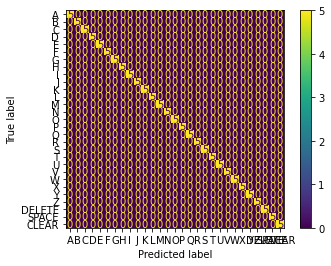

In [35]:
%matplotlib inline

disp.plot()

# disp.plot(cmap = plt.cm.Blues)

In [39]:
# model.summary()

In [36]:
pred.shape

(145, 29)

In [130]:
ls = []
for i in range(145):
    ls.append(np.argmax(pred[i]))

In [29]:
import cv2
import time
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math
from tkinter import *
from random import randint
import threading
from pynput.keyboard import Key, Controller
import tensorflow as tf
 
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)

model = tf.keras.models.load_model('model/transferlearned_gesture.h5')
# model = Classifier("model/keras_model.h5", "model/labels.txt")

keyboard = Controller()

offset = 20
imgSize = 224
 
# labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'DELETE', 'SPACE', 'CLEAR']    
randLabels = ['A','B','K','L','M','N','O','P','Q','R','S','T','C','U','V','W','X','Y','Z','DELETE','SPACE','CLEAR','D','E','F','G','H','I','J']
text = ''

t = None

def press():
    global t
    keyboard.press('s')
    keyboard.release('s') 
    t = threading.Timer(2, press)
    t.start()
    
press()

success = True

while success:
    try:
        success, img = cap.read()
        imgOutput = img.copy()
        hands, img = detector.findHands(img)
        out = img.copy()
        if hands:
            hand = hands[0]
            x, y, w, h = hand['bbox']

            imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
            imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

            imgCropShape = imgCrop.shape

            aspectRatio = h / w

    #         cv2.rectangle(imgOutput, (x - offset, y - offset-50),(x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
    #         cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)

            cv2.rectangle(imgOutput, (x-offset, y-offset),(x + w+offset, y + h+offset), (0, 0, 255), cv2.FILLED)
            cv2.putText(out, text, (50,100), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1)

        key = cv2.waitKey(5)

        if key == ord('s') and hands:

            alpha = 0.01
            mask = imgOutput.astype(bool)
            out[mask] = cv2.addWeighted(img, alpha, imgOutput, 1 - alpha, 0)[mask]
            cv2.imshow("ImageO", out)

            if aspectRatio > 1:
                k = imgSize / h
                wCal = math.ceil(k * w)
                imgResize = cv2.resize(imgCrop, (wCal, imgSize))
                imgResizeShape = imgResize.shape
                wGap = math.ceil((imgSize - wCal) / 2)
                imgWhite[:, wGap:wCal + wGap] = imgResize

                norm=imgWhite/255.0
                reshaped=np.reshape(norm,(1,224,224,3))
                reshaped = np.vstack([reshaped])

#                 pred, index = model.getPrediction(imgWhite, draw=False)

                pred = model.predict(reshaped)
                index = np.argmax(pred)


            else:
                k = imgSize / w
                hCal = math.ceil(k * h)
                imgResize = cv2.resize(imgCrop, (imgSize, hCal))
                imgResizeShape = imgResize.shape
                hGap = math.ceil((imgSize - hCal) / 2)
                imgWhite[hGap:hCal + hGap, :] = imgResize

                norm=imgWhite/255.0
                reshaped=np.reshape(norm,(1,224,224,3))
                reshaped = np.vstack([reshaped])

#                 pred, index = model.getPrediction(imgWhite, draw=False)

                pred = model.predict(reshaped)
                index = np.argmax(pred)


            def update(text):
                if randLabels[index] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
                    text = text+randLabels[index]
                elif randLabels[index] == 'DELETE' and text:
                    text = text[:-1]
                elif randLabels[index] == 'SPACE':
                    text = text+' '
                elif randLabels[index] == 'CLEAR':
                    text = ''
                else:
                    pass

                return text

            text = update(text)

        else:    
            cv2.imshow("ImageO", out)

        k = cv2.waitKey(5)
        if k == ord('q'):
            break
    except:
        print('an error occured')

t.cancel()        
cap.release()
cv2.destroyAllWindows()   

1/1 [==============================] - 0s 29ms/step
